Cargar imagen

(np.float64(-0.5), np.float64(429.5), np.float64(429.5), np.float64(-0.5))

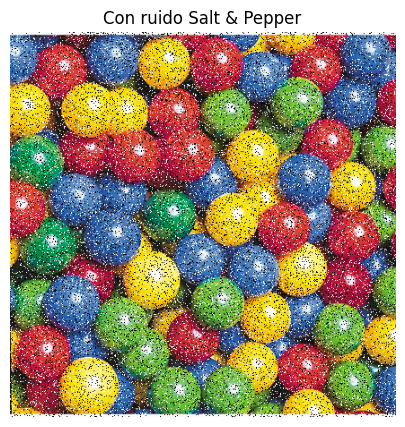

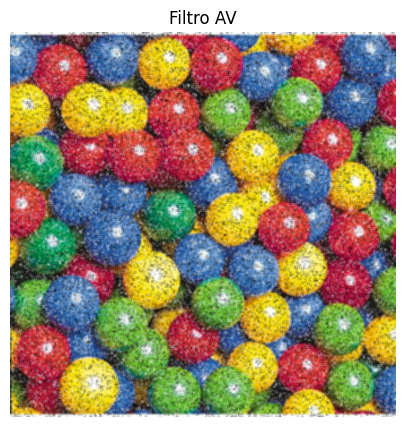

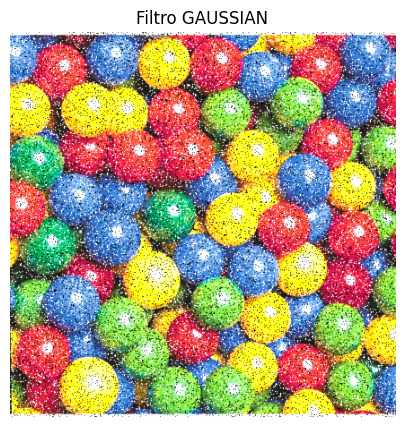

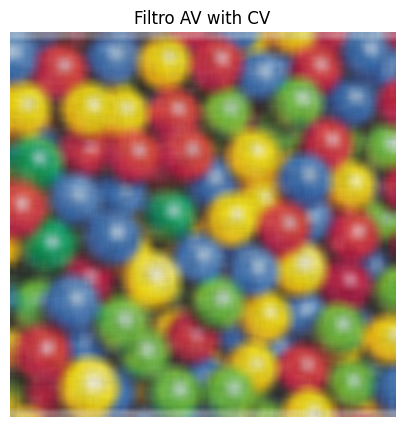

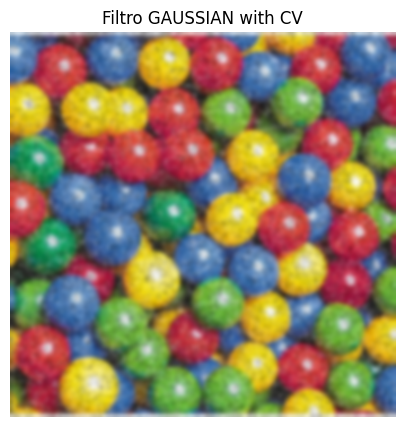

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def agregar_ruido_salt_pepper(imagen, cantidad=0.02):
    salida = np.copy(imagen)
    filas, columnas, canales = salida.shape
    num_pixeles = int(cantidad * filas * columnas)

    # Sal (píxeles blancos)
    for _ in range(num_pixeles):
        i = np.random.randint(0, filas)
        j = np.random.randint(0, columnas)
        salida[i, j] = [255, 255, 255]

    # Pimienta (píxeles negros)
    for _ in range(num_pixeles):
        i = np.random.randint(0, filas)
        j = np.random.randint(0, columnas)
        salida[i, j] = [0, 0, 0]

    return salida


# Cargar imagen en formato RGB
imagen_rgb = cv2.imread('pool.jpg')
imagen_rgb = cv2.cvtColor(imagen_rgb, cv2.COLOR_BGR2RGB)  # OpenCV carga en BGR por defecto
imagen_gray = cv2.cvtColor(imagen_rgb,cv2.COLOR_RGB2GRAY)

# Convertir de RGB a HSV
imagen_hsv = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2HSV)


# Agregar ruido
imagen_ruido = agregar_ruido_salt_pepper(imagen_rgb, cantidad=0.1)

# Mostrar imagen original y con ruido
plt.figure(figsize=(10, 5))
plt.title("Con ruido Salt & Pepper")
plt.imshow(imagen_ruido)
plt.axis('off')


#KERNEL
euler = 2.7182818284590452353602874713527
pi = 3.14159265358979323846264338327950

AV_filter = np.array([[1, 1, 1],
                      [1, 1, 1],
                      [1, 1, 1]]) / 9



GAUSSIAN_filter = np.array([[np.power(euler,-4), np.power(euler,-2), np.power(euler,-4)],
                            [np.power(euler,-2), 1, np.power(euler,-2)],
                            [np.power(euler,-4), np.power(euler,-2), np.power(euler,-4)]]) / (4/pi)


img_av = cv2.filter2D(src=imagen_ruido, ddepth=-1, kernel=AV_filter)
img_gauss = cv2.filter2D(src=imagen_ruido, ddepth=-1, kernel=GAUSSIAN_filter)

img_gauss_cv = cv2.GaussianBlur(src=imagen_ruido, ksize=(15, 15), sigmaX=0)
img_av_cv = cv2.blur(src=imagen_ruido, ksize=(15, 15))


plt.figure(figsize=(10, 5))
plt.title("Filtro AV")
plt.imshow(img_av)
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.title("Filtro GAUSSIAN")
plt.imshow(img_gauss)
plt.axis('off')


plt.figure(figsize=(10, 5))
plt.title("Filtro AV with CV")
plt.imshow(img_av_cv)
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.title("Filtro GAUSSIAN with CV")
plt.imshow(img_gauss_cv)
plt.axis('off')


Visualizacion de imagenes

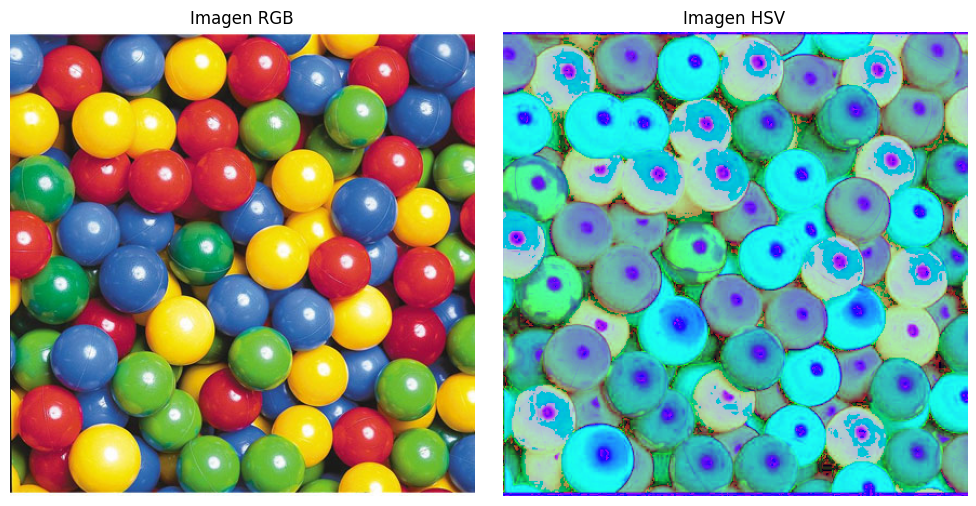

In [12]:
# Visualizar RGB y HSV con matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Imagen RGB")
plt.imshow(imagen_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Imagen HSV")
plt.imshow(imagen_hsv)
plt.axis('off')

plt.tight_layout()
plt.show()

(np.float64(-0.5), np.float64(690.5), np.float64(690.5), np.float64(-0.5))

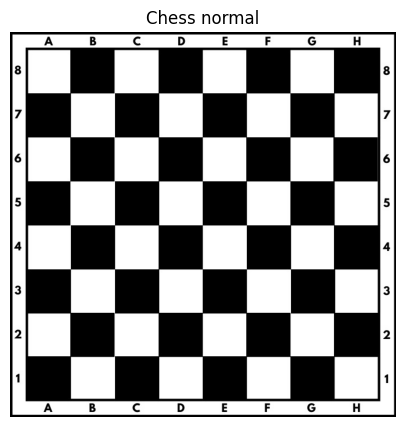

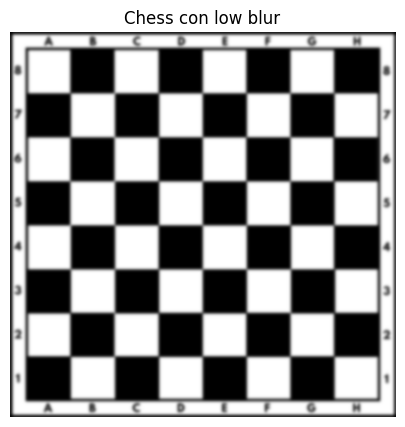

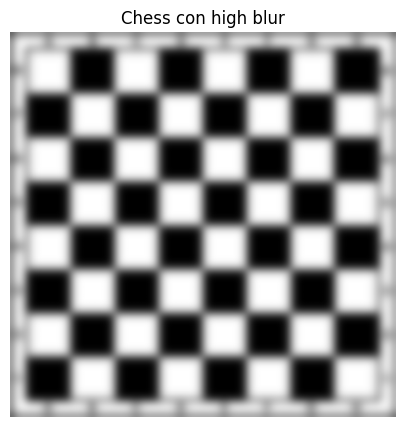

In [35]:
imagen_chess = cv2.imread('chess_board.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))
plt.title("Chess normal")
plt.imshow(imagen_chess, cmap='gray')
plt.axis('off')

img_blur = cv2.GaussianBlur(imagen_chess, (15, 15), 0)
plt.figure(figsize=(10, 5))
plt.title("Chess con low blur")
plt.imshow(img_blur, cmap='gray')
plt.axis('off')


img_blur = cv2.GaussianBlur(imagen_chess, (55, 55), 0)
plt.figure(figsize=(10, 5))
plt.title("Chess con high blur")
plt.imshow(img_blur, cmap='gray')
plt.axis('off')

(654, 500, 3)


(np.float64(-0.5), np.float64(62.5), np.float64(81.5), np.float64(-0.5))

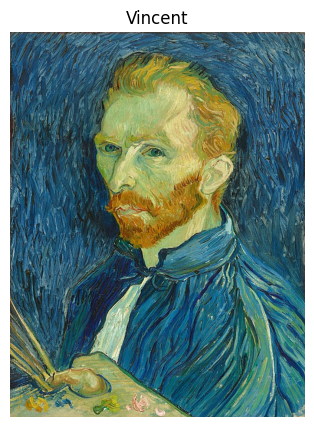

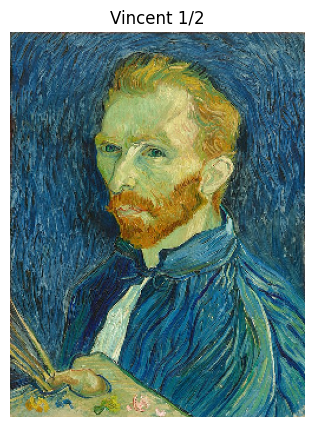

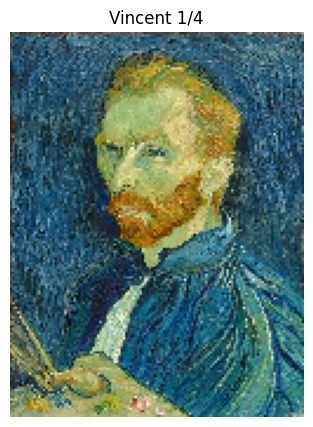

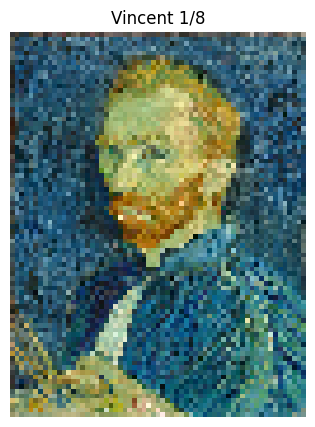

In [47]:
# Cargar imagen en formato RGB
img_VV = cv2.imread('VVG.jpg')
img_VV = cv2.cvtColor(img_VV, cv2.COLOR_BGR2RGB)  # OpenCV carga en BGR por defecto

print(img_VV.shape)
plt.figure(figsize=(10, 5))
plt.title("Vincent")
plt.imshow(img_VV)
plt.axis('off')


img_1_2 = img_VV[::2, ::2]  # Toma filas y columnas alternas
plt.figure(figsize=(10, 5))
plt.title("Vincent 1/2")
plt.imshow(img_1_2)
plt.axis('off')

img_1_4 = img_1_2[::2, ::2]  # Toma filas y columnas alternas
plt.figure(figsize=(10, 5))
plt.title("Vincent 1/4")
plt.imshow(img_1_4)
plt.axis('off')

img_1_8 = img_1_4[::2, ::2]  # Toma filas y columnas alternas
plt.figure(figsize=(10, 5))
plt.title("Vincent 1/8")
plt.imshow(img_1_8)
plt.axis('off')

Texto detectado:
:
TU - TEXTO
711
24


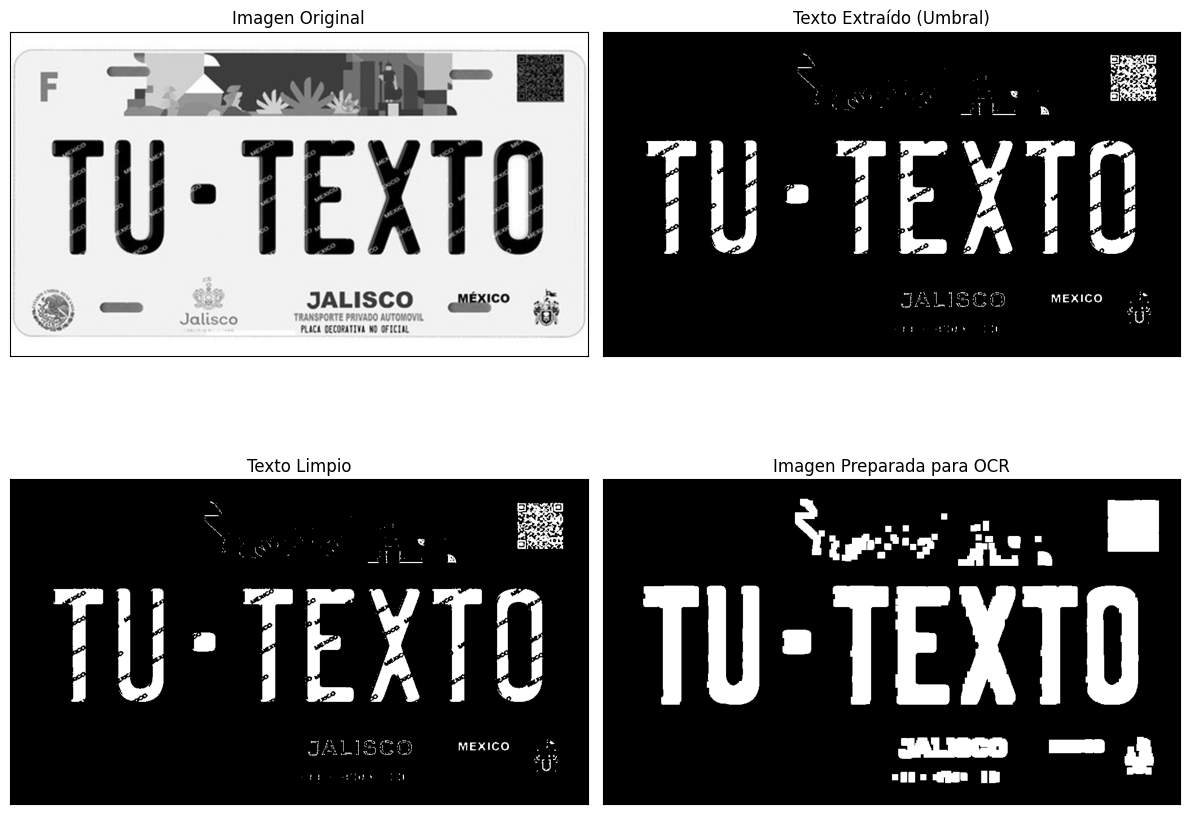

In [61]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#!pip install easyocr
import easyocr  # Reemplazando pytesseract con easyocr

# Reemplaza esta ruta con la ubicación de tu imagen
img = cv.imread('placa_4.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# 1. Aplicar umbralización binaria con umbral muy alto para capturar solo los pixels muy negros
_, text_mask = cv.threshold(img, 50, 255, cv.THRESH_BINARY_INV)  # Ajustado a 50 para mejor detección

# 2. Aplicar operación morfológica para eliminar ruido pequeño
kernel = np.ones((1, 1), np.uint8)
cleaned_text = cv.morphologyEx(text_mask, cv.MORPH_OPEN, kernel)

# 3. Crear una máscara binaria donde solo está el texto (para visualizar mejor)
text_only = cv.bitwise_and(img, img, mask=cleaned_text)

# 4. Preparar imagen para OCR (formato estándar)
# EasyOCR puede trabajar con ambos formatos, pero generalmente prefiere texto blanco sobre fondo negro
# Mantenemos la imagen binaria con texto en blanco para mejor precisión
ocr_image = cleaned_text

# 5. Aplicar un poco de dilatación para conectar componentes de texto que podrían estar separados
kernel_dilate = np.ones((11, 11), np.uint8)
ocr_image = cv.dilate(ocr_image, kernel_dilate, iterations=1)

# 6. Realizar OCR en la imagen procesada usando EasyOCR
try:
    # Inicializar el lector de EasyOCR para español (puedes cambiarlo a otros idiomas)
    reader = easyocr.Reader(['es', 'en'])  # Admite detección en español e inglés

    # Realizar el reconocimiento de texto
    # Convertimos nuestra imagen procesada a formato PIL para EasyOCR
    results = reader.readtext(ocr_image)

    # Extraer texto de los resultados
    text_detected = "\n".join([text for _, text, _ in results])
    print("Texto detectado:")
    print(text_detected)
except Exception as e:
    print(f"Error al realizar OCR: {e}")
    print("Asegúrate de tener instalado EasyOCR: pip install easyocr")

# Mostrar resultados
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Imagen Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2), plt.imshow(text_mask, cmap='gray')
plt.title('Texto Extraído (Umbral)'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 3), plt.imshow(cleaned_text, cmap='gray')
plt.title('Texto Limpio'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 4), plt.imshow(ocr_image, cmap='gray')
plt.title('Imagen Preparada para OCR'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()